In [129]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
from time import time
from time import sleep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e6310a7d-61c7-497e-81a9-3d2dcabdb5c6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [131]:
type(data)

dict

In [132]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)

In [133]:
df = pd.json_normalize(data["data"])
df["timestamp"] = pd.to_datetime("now")
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10695,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19594375.000000,19594375.000000,False,NaN,1,NaN,NaN,None,2024-01-10T06:30:00.000Z,45997.749535,38141642217.365860,-9.243100,0.099802,-1.696289,1.533294,9.750317,24.049922,71.115207,901297153538.577271,52.670800,965952740228.260010,None,2024-01-10T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 13:32:03.851015
1,1027,Ethereum,ETH,ethereum,8205,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120184170.656662,120184170.656662,True,NaN,2,NaN,NaN,None,2024-01-10T06:31:00.000Z,2377.836698,17017250860.534475,30.563100,-0.261450,3.142679,-0.098008,6.193928,15.651281,51.905594,285778331543.666748,16.700600,285778331543.669983,None,2024-01-10T06:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 13:32:03.851015
2,825,Tether USDt,USDT,tether,70959,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,94341083432.797119,97602960965.174561,True,NaN,3,NaN,NaN,None,2024-01-10T06:30:00.000Z,1.000417,60785803931.762154,2.751100,0.001656,-0.010668,0.003751,0.045419,-0.008693,0.071921,94380401592.287476,5.515500,97643638564.440002,None,2024-01-10T06:30:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-10 13:32:03.851015
3,1839,BNB,BNB,bnb,2004,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151690521.832213,151690521.832213,False,NaN,4,NaN,NaN,None,2024-01-10T06:30:00.000Z,300.665113,1275291949.523166,14.730600,-0.119558,-0.490009,-5.838183,29.586560,21.001637,45.936981,45608047961.102203,2.665300,45608047961.099998,None,2024-01-10T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 13:32:03.851015
4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,431919195.089207,566721940.380063,True,NaN,5,NaN,NaN,None,2024-01-10T06:30:00.000Z,98.669410,3387761157.631176,-18.420300,-0.339045,-3.333914,-9.959051,43.434155,78.299687,352.610950,42617211932.860153,2.490500,55918119210.220001,None,2024-01-10T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 13:32:03.851015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,6636,Polkadot,DOT,polkadot-new,660,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1337147059.234049,1398385685.884074,True,NaN,11,NaN,NaN,None,2024-01-10T06:30:00.000Z,7.153207,279973633.389001,4.903000,-0.027747,-3.265348,-16.396563,6.784359,36.601477,91.969434,9564889054.805880,0.559100,10002941597.889999,None,2024-01-10T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 13:32:03.851015
11,1958,TRON,TRX,tron,895,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, dwf-labs-por...",NaN,88267811599.633926,88267857453.411133,True,NaN,12,71659659264.000000,7446674447.439445,None,2024-01-10T06:30:00.000Z,0.103917,266258943.080380,4.670500,0.209566,-0.329176,-4.982610,-0.255413,-1.583636,20.415017,9172547901.028114,0.536000,9172552666.030001,None,2024-01-10T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 13:32:03.851015
12,3890,Polygon,MATIC,polygon,1235,2019-04-28T00:00:00.000Z,"[pos, platform, enterprise-solutions, zero-kno...",10000000000.000000,9562602206.919949,10000000000.

In [134]:
def api_update():
   global df
   from requests import Request, Session
   from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
   import json

   url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
   #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
   parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
      }
   headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e6310a7d-61c7-497e-81a9-3d2dcabdb5c6',
      }

   session = Session()
   session.headers.update(headers)

   try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
   except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
      
   df = pd.json_normalize(data["data"])
   df["timestamp"] = pd.to_datetime("now")
   df = df._append(df)
   
   if not os.path.isfile(r'C:/Users/Alexandra-PK/Desktop/Work/Portfolio/Python/API.csv'):
      df.to_csv(r'C:/Users/Alexandra-PK/Desktop/Work/Portfolio/Python/API.csv', header = 'column_names')
   else:
      df.to_csv(r'C:/Users/Alexandra-PK/Desktop/Work/Portfolio/Python/API.csv', mode = "a", header = False)
      
   

In [135]:
for i in range(333):
   api_update()
   print("API update completed")
   sleep(60) 
exit() #stop after a few minutes - just for example

API update completed
API update completed
API update completed
API update completed
API update completed
API update completed
API update completed


KeyboardInterrupt: 

In [136]:
df_csv = pd.read_csv("C:/Users/Alexandra-PK/Desktop/Work/Portfolio/Python/API.csv")
df_csv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10695,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19594306.000000,19594306.000000,False,NaN,1,NaN,NaN,NaN,2024-01-10T05:42:00.000Z,45972.588046,38312540241.818359,-10.860000,-0.245866,-1.531452,1.481191,9.596557,23.821095,71.251033,900800957792.963623,52.704600,965424348974.250000,NaN,2024-01-10T05:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 12:43:09.075111
1,1,1027,Ethereum,ETH,ethereum,8205,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120184170.656662,120184170.656662,True,NaN,2,NaN,NaN,NaN,2024-01-10T05:42:00.000Z,2389.126589,16883369369.932182,27.309400,0.600694,3.469154,0.439029,6.580717,16.158336,52.884212,287135197685.838074,16.799900,287135197685.840027,NaN,2024-01-10T05:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 12:43:09.075111
2,2,825,Tether USDt,USDT,tether,70958,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,94341083432.797119,97602960965.174561,True,NaN,3,NaN,NaN,NaN,2024-01-10T05:41:00.000Z,1.000409,60923329231.456108,1.488700,0.016145,-0.020150,0.016293,0.029635,-0.015722,0.067299,94379673411.724045,5.523300,97642885206.759995,NaN,2024-01-10T05:41:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-10 12:43:09.075111
3,3,1839,BNB,BNB,bnb,2004,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151690532.084635,151690532.084635,False,NaN,4,NaN,NaN,NaN,2024-01-10T05:41:00.000Z,300.686234,1285602099.327910,15.749800,-0.281644,-0.311058,-4.946168,29.018778,20.735225,46.168356,45611254860.934837,2.669300,45611254860.930000,NaN,2024-01-10T05:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 12:43:09.075111
4,4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,431919341.842509,566722087.133365,True,NaN,5,NaN,NaN,NaN,2024-01-10T05:42:00.000Z,99.130208,3492011136.678915,-16.188100,-0.501644,-3.004788,-8.766118,42.000493,81.120561,355.342240,42816254368.530510,2.505100,56179278602.010002,NaN,2024-01-10T05:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 12:43:09.075111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10,6636,Polkadot,DOT,polkadot-new,660,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1337147059.234049,1398385685.884073,True,NaN,11,NaN,NaN,NaN,2024-01-10T06:36:00.000Z,7.125914,279705637.013538,5.175300,-0.218864,-3.564836,-16.635432,6.293847,35.713446,91.145785,9528395224.291857,0.557500,9964776423.870001,NaN,2024-01-10T06:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 13:38:19.832975
296,11,1958,TRON,TRX,tron,895,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'dwf-l...",NaN,88267811599.633926,88267857453.411133,True,NaN,12,71659659264.000000,7441565169.739186,NaN,2024-01-10T06:36:00.000Z,0.103846,265979637.424424,4.680600,0.125795,-0.470574,-5.068751,-0.321801,-1.691514,20.446616,9166254475.046345,0.536200,9166259236.780001,NaN,2024-01-10T06:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 13:38:19.832975
297,12,3890,Polygon,MATIC,polygon,1235,2019-04-28T00:00:00.000Z,"['pos', 'platform', 'enterprise-solutions', 'z...",10000000000.000000,95626022

In [137]:
#change float format 

pd.set_option("display.float_format", lambda x: '%5f' % x)

In [138]:
df_csv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10695,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19594306.000000,19594306.000000,False,NaN,1,NaN,NaN,NaN,2024-01-10T05:42:00.000Z,45972.588046,38312540241.818359,-10.860000,-0.245866,-1.531452,1.481191,9.596557,23.821095,71.251033,900800957792.963623,52.704600,965424348974.250000,NaN,2024-01-10T05:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 12:43:09.075111
1,1,1027,Ethereum,ETH,ethereum,8205,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120184170.656662,120184170.656662,True,NaN,2,NaN,NaN,NaN,2024-01-10T05:42:00.000Z,2389.126589,16883369369.932182,27.309400,0.600694,3.469154,0.439029,6.580717,16.158336,52.884212,287135197685.838074,16.799900,287135197685.840027,NaN,2024-01-10T05:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 12:43:09.075111
2,2,825,Tether USDt,USDT,tether,70958,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,94341083432.797119,97602960965.174561,True,NaN,3,NaN,NaN,NaN,2024-01-10T05:41:00.000Z,1.000409,60923329231.456108,1.488700,0.016145,-0.020150,0.016293,0.029635,-0.015722,0.067299,94379673411.724045,5.523300,97642885206.759995,NaN,2024-01-10T05:41:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-10 12:43:09.075111
3,3,1839,BNB,BNB,bnb,2004,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151690532.084635,151690532.084635,False,NaN,4,NaN,NaN,NaN,2024-01-10T05:41:00.000Z,300.686234,1285602099.327910,15.749800,-0.281644,-0.311058,-4.946168,29.018778,20.735225,46.168356,45611254860.934837,2.669300,45611254860.930000,NaN,2024-01-10T05:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 12:43:09.075111
4,4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,431919341.842509,566722087.133365,True,NaN,5,NaN,NaN,NaN,2024-01-10T05:42:00.000Z,99.130208,3492011136.678915,-16.188100,-0.501644,-3.004788,-8.766118,42.000493,81.120561,355.342240,42816254368.530510,2.505100,56179278602.010002,NaN,2024-01-10T05:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 12:43:09.075111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10,6636,Polkadot,DOT,polkadot-new,660,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1337147059.234049,1398385685.884073,True,NaN,11,NaN,NaN,NaN,2024-01-10T06:36:00.000Z,7.125914,279705637.013538,5.175300,-0.218864,-3.564836,-16.635432,6.293847,35.713446,91.145785,9528395224.291857,0.557500,9964776423.870001,NaN,2024-01-10T06:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 13:38:19.832975
296,11,1958,TRON,TRX,tron,895,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'dwf-l...",NaN,88267811599.633926,88267857453.411133,True,NaN,12,71659659264.000000,7441565169.739186,NaN,2024-01-10T06:36:00.000Z,0.103846,265979637.424424,4.680600,0.125795,-0.470574,-5.068751,-0.321801,-1.691514,20.446616,9166254475.046345,0.536200,9166259236.780001,NaN,2024-01-10T06:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 13:38:19.832975
297,12,3890,Polygon,MATIC,polygon,1235,2019-04-28T00:00:00.000Z,"['pos', 'platform', 'enterprise-solutions', 'z...",10000000000.000000,95626022

In [139]:
df_gr = df_csv.groupby("name", sort = False)[["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d"]].mean()
df_gr

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d
name,,,,
Bitcoin,-0.063391,-1.672618,1.505475,9.696636
Ethereum,-0.059186,3.225299,0.035907,6.280156
Tether USDt,-0.000907,-0.017904,-0.022877,0.033098
BNB,-0.167433,-0.468767,-5.702506,29.319852
Solana,-0.447925,-3.361661,-9.662316,42.669483
...,...,...,...,...
TRON,0.167075,-0.400286,-5.082432,-0.370267
Polkadot,-0.122722,-3.455744,-16.512575,6.074007
Polygon,0.692256,0.140667,-16.474039,-3.726716


In [140]:
df_crypto_stack = df_gr.stack()
df_crypto_stack

name                                   
Bitcoin    quote.USD.percent_change_1h    -0.063391
           quote.USD.percent_change_24h   -1.672618
           quote.USD.percent_change_7d     1.505475
           quote.USD.percent_change_30d    9.696636
Ethereum   quote.USD.percent_change_1h    -0.059186
                                             ...   
Chainlink  quote.USD.percent_change_30d   -8.096637
Toncoin    quote.USD.percent_change_1h     0.151774
           quote.USD.percent_change_24h   -3.095797
           quote.USD.percent_change_7d    -3.805510
           quote.USD.percent_change_30d    2.822389
Length: 60, dtype: float64

In [141]:
df_crypto = df_crypto_stack.to_frame(name = "values")
df_crypto

values
name                                            
Bitcoin   quote.USD.percent_change_1h  -0.063391
          quote.USD.percent_change_24h -1.672618
          quote.USD.percent_change_7d   1.505475
          quote.USD.percent_change_30d  9.696636
Ethereum  quote.USD.percent_change_1h  -0.059186
...                                          ...
Chainlink quote.USD.percent_change_30d -8.096637
Toncoin   quote.USD.percent_change_1h   0.151774
          quote.USD.percent_change_24h -3.095797
          quote.USD.percent_change_7d  -3.805510
          quote.USD.percent_change_30d  2.822389

[60 rows x 1 columns]

In [142]:
df_crypto.count()

values    60
dtype: int64

In [143]:
index = pd.Index(range(60))

df_crypto_index = df_crypto.reset_index()
df_crypto_index = df_crypto_index.rename(columns= {"level_1": "%_changes"})
df_crypto_index

,name,%_changes,values
0,Bitcoin,quote.USD.percent_change_1h,-0.063391
1,Bitcoin,quote.USD.percent_change_24h,-1.672618
2,Bitcoin,quote.USD.percent_change_7d,1.505475
3,Bitcoin,quote.USD.percent_change_30d,9.696636
4,Ethereum,quote.USD.percent_change_1h,-0.059186
...,...,...,...
55,Chainlink,quote.USD.percent_change_30d,-8.096637
56,Toncoin,quote.USD.percent_change_1h,0.151774
57,Toncoin,quote.USD.percent_change_24h,-3.095797
58,Toncoin,quote.USD.percent_change_7d,-3.805510


In [144]:
df_crypto_index['%_changes'] = df_crypto_index['%_changes'].str.replace('quote.USD.percent_change_','')
df_crypto_index

,name,%_changes,values
0,Bitcoin,1h,-0.063391
1,Bitcoin,24h,-1.672618
2,Bitcoin,7d,1.505475
3,Bitcoin,30d,9.696636
4,Ethereum,1h,-0.059186
...,...,...,...
55,Chainlink,30d,-8.096637
56,Toncoin,1h,0.151774
57,Toncoin,24h,-3.095797
58,Toncoin,7d,-3.805510


c:\Users\Alexandra-PK\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


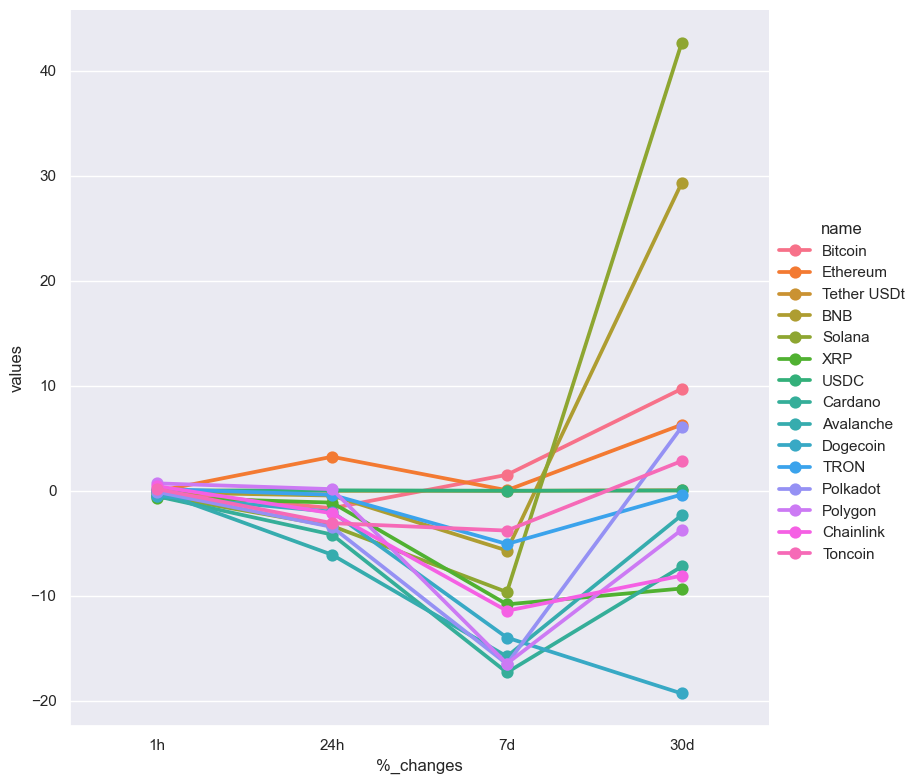

In [145]:
sns.catplot(x = "%_changes", y = "values", hue = "name", data = df_crypto_index, 
            kind = "point", height = 8)

In [151]:
#changes of your favourite token 
token_df = df_csv[["name", "quote.USD.price", "timestamp"]]
token_df

,name,quote.USD.price,timestamp
0,Bitcoin,45972.588046,2024-01-10 12:43:09.075111
1,Ethereum,2389.126589,2024-01-10 12:43:09.075111
2,Tether USDt,1.000409,2024-01-10 12:43:09.075111
3,BNB,300.686234,2024-01-10 12:43:09.075111
4,Solana,99.130208,2024-01-10 12:43:09.075111
...,...,...,...
295,Polkadot,7.125914,2024-01-10 13:38:19.832975
296,TRON,0.103846,2024-01-10 13:38:19.832975
297,Polygon,0.824845,2024-01-10 13:38:19.832975
298,Chainlink,13.729532,2024-01-10 13:38:19.832975


In [176]:
bitcoin_df = token_df.loc[token_df['name'] == 'Bitcoin']
bitcoin_df

,name,quote.USD.price,timestamp
0,Bitcoin,45972.588046,2024-01-10 12:43:09.075111
15,Bitcoin,45972.588046,2024-01-10 12:43:09.075111
30,Bitcoin,45971.426524,2024-01-10 12:44:10.063506
45,Bitcoin,45971.426524,2024-01-10 12:44:10.063506
60,Bitcoin,45968.942940,2024-01-10 12:45:10.497644
...,...,...,...
225,Bitcoin,45975.212043,2024-01-10 13:36:14.171646
240,Bitcoin,45933.556771,2024-01-10 13:37:18.881876
255,Bitcoin,45933.556771,2024-01-10 13:37:18.881876
270,Bitcoin,45933.556771,2024-01-10 13:38:19.832975


In [183]:
bitcoin_df['timestamp'] = pd.to_datetime(bitcoin_df['timestamp'])

# change the datetime format
bitcoin_df['date_formatted'] = bitcoin_df['timestamp'].dt.strftime('%H:%M:%S')

print(bitcoin_df)

        name  quote.USD.price                  timestamp date_formatted
0    Bitcoin     45972.588046 2024-01-10 12:43:09.075111       12:43:09
15   Bitcoin     45972.588046 2024-01-10 12:43:09.075111       12:43:09
30   Bitcoin     45971.426524 2024-01-10 12:44:10.063506       12:44:10
45   Bitcoin     45971.426524 2024-01-10 12:44:10.063506       12:44:10
60   Bitcoin     45968.942940 2024-01-10 12:45:10.497644       12:45:10
..       ...              ...                        ...            ...
225  Bitcoin     45975.212043 2024-01-10 13:36:14.171646       13:36:14
240  Bitcoin     45933.556771 2024-01-10 13:37:18.881876       13:37:18
255  Bitcoin     45933.556771 2024-01-10 13:37:18.881876       13:37:18
270  Bitcoin     45933.556771 2024-01-10 13:38:19.832975       13:38:19
285  Bitcoin     45933.556771 2024-01-10 13:38:19.832975       13:38:19

[20 rows x 4 columns]


C:\Users\Alexandra-PK\AppData\Local\Temp\ipykernel_9288\2696977443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_df['timestamp'] = pd.to_datetime(bitcoin_df['timestamp'])
C:\Users\Alexandra-PK\AppData\Local\Temp\ipykernel_9288\2696977443.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_df['date_formatted'] = bitcoin_df['timestamp'].dt.strftime('%H:%M:%S')


[Text(0.5, 0, 'Time'), Text(0, 0.5, 'USD price')]

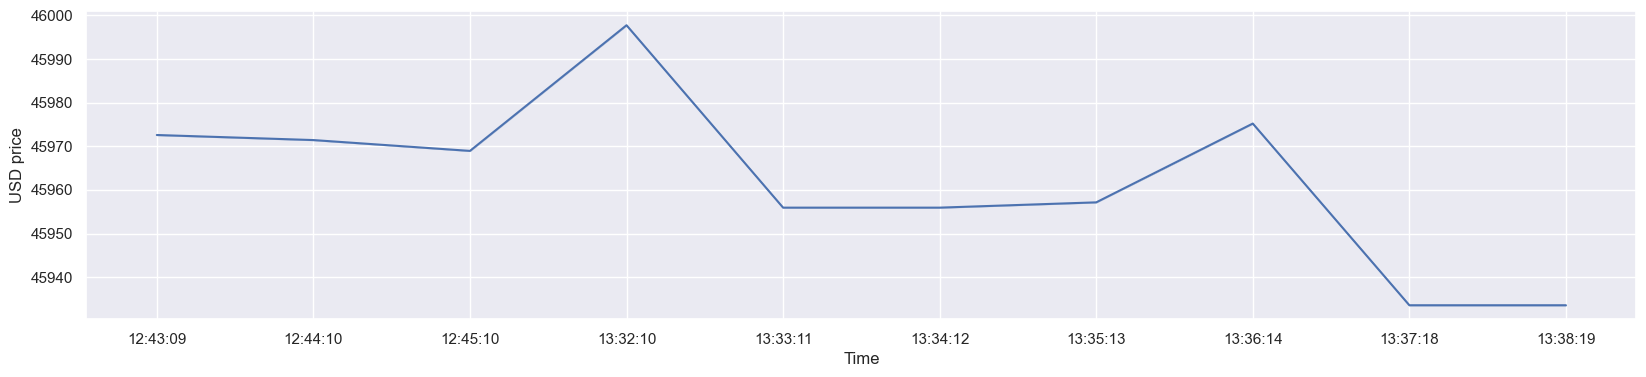

In [187]:
pl = sns.lineplot(x = "date_formatted", y = "quote.USD.price", data = bitcoin_df)
pl.set(xlabel = "Time", ylabel = "USD price")